In [95]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [96]:
df = pd.read_csv(r'C:\Users\ACER\Desktop\credit\Credit Card Defaulter Prediction.csv')

In [97]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [98]:
df.head

<bound method NDFrame.head of           ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000   F   University  Married   24      2      2     -1   
1          2     120000   F   University   Single   26     -1      2      0   
2          3      90000   F   University   Single   34      0      0      0   
3          4      50000   F   University  Married   37      0      0      0   
4          5      50000   M   University  Married   57     -1      0     -1   
...      ...        ...  ..          ...      ...  ...    ...    ...    ...   
29995  29996     220000   M  High School  Married   39      0      0      0   
29996  29997     150000   M  High School   Single   43     -1     -1     -1   
29997  29998      30000   M   University   Single   37      4      3      2   
29998  29999      80000   M  High School  Married   41      1     -1      0   
29999  30000      50000   M   University  Married   46      0      0      0   

       PAY_4  ...  BI

In [99]:
df.info

<bound method DataFrame.info of           ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000   F   University  Married   24      2      2     -1   
1          2     120000   F   University   Single   26     -1      2      0   
2          3      90000   F   University   Single   34      0      0      0   
3          4      50000   F   University  Married   37      0      0      0   
4          5      50000   M   University  Married   57     -1      0     -1   
...      ...        ...  ..          ...      ...  ...    ...    ...    ...   
29995  29996     220000   M  High School  Married   39      0      0      0   
29996  29997     150000   M  High School   Single   43     -1     -1     -1   
29997  29998      30000   M   University   Single   37      4      3      2   
29998  29999      80000   M  High School  Married   41      1     -1      0   
29999  30000      50000   M   University  Married   46      0      0      0   

       PAY_4  ...  

In [100]:
df.shape

(30000, 25)

In [101]:
df.describe

<bound method NDFrame.describe of           ID  LIMIT_BAL SEX    EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000   F   University  Married   24      2      2     -1   
1          2     120000   F   University   Single   26     -1      2      0   
2          3      90000   F   University   Single   34      0      0      0   
3          4      50000   F   University  Married   37      0      0      0   
4          5      50000   M   University  Married   57     -1      0     -1   
...      ...        ...  ..          ...      ...  ...    ...    ...    ...   
29995  29996     220000   M  High School  Married   39      0      0      0   
29996  29997     150000   M  High School   Single   43     -1     -1     -1   
29997  29998      30000   M   University   Single   37      4      3      2   
29998  29999      80000   M  High School  Married   41      1     -1      0   
29999  30000      50000   M   University  Married   46      0      0      0   

       PAY_4  ...

In [102]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [103]:
df.dtypes

ID            int64
LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
dtype: object

In [104]:
df['default '].unique

<bound method Series.unique of 0        Y
1        Y
2        N
3        N
4        N
        ..
29995    N
29996    N
29997    Y
29998    Y
29999    Y
Name: default , Length: 30000, dtype: object>

In [105]:
df1 = df[df['default ']=='Y']

<AxesSubplot:xlabel='SEX', ylabel='count'>

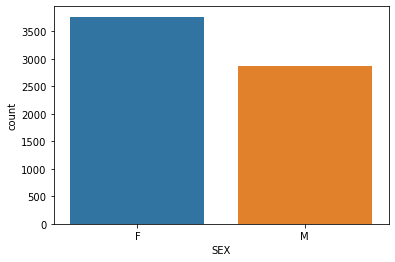

In [106]:
sns.countplot(data=df1, x=df1['SEX'] )

<AxesSubplot:xlabel='default ', ylabel='count'>

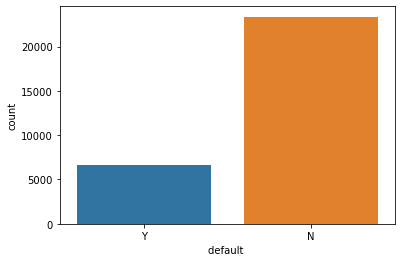

In [107]:
sns.countplot(data=df, x=df['default '] )

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

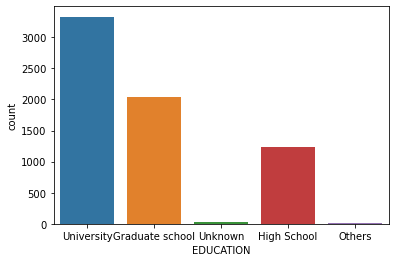

In [108]:
sns.countplot(data=df1, x=df1['EDUCATION'] )

In [109]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

In [110]:
#cat_var = ['SEX','EDUCATION','MARRIAGE']

In [111]:
#df[cat_var]

In [112]:
df['EDUCATION'].value_counts()

University         14030
Graduate school    10585
High School         4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64

In [113]:
df['default '].value_counts()

N    23364
Y     6636
Name: default , dtype: int64

In [114]:
drop = df[df['EDUCATION']=='0']

In [115]:
drop

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
3769,3770,290000,F,0,Single,38,1,-1,-1,-1,...,1406,2196,1481,1437,3078,1406,2196,1481,0,N
5945,5946,270000,M,0,Single,39,1,-1,-1,-1,...,18607,0,0,10193,70213,19008,399,0,0,N
6876,6877,360000,M,0,Single,30,0,0,-1,0,...,34345,36777,30,23000,12280,25007,25008,1767,3300,N
14631,14632,350000,F,0,Single,53,-1,-1,-1,-1,...,22611,1385,6043,4840,61349,22687,1389,6058,1153,N
15107,15108,210000,M,0,Single,45,-2,-2,-2,-2,...,788,3499,3372,5854,1032,788,3565,3372,15381,N
16881,16882,100000,M,0,Single,37,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,N
16896,16897,200000,M,0,Single,40,1,-2,-1,-1,...,1000,0,0,0,200,1000,0,0,0,N
17414,17415,230000,F,0,Single,47,-1,-1,-1,2,...,255,5425,4838,5743,1598,0,5425,4838,3840,N
19920,19921,50000,F,0,Married,40,0,0,0,0,...,47647,40500,41921,2229,2298,2100,2500,1921,8432,N
20030,20031,200000,F,0,Single,30,-1,-1,2,-1,...,9470,5816,7809,2880,0,9470,5834,7809,2886,N


In [116]:
df.drop(df[df['EDUCATION']=='0'].index,inplace=True)

In [182]:
df.drop(df[df['MARRIAGE']=='0'].index,inplace=True)

In [117]:
df[df['EDUCATION']=='0']

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default


In [183]:
df[df['MARRIAGE']=='0']

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default


In [184]:
df['EDUCATION'].value_counts()

University         14024
Graduate school    10581
High School         4873
Unknown              331
Others               123
Name: EDUCATION, dtype: int64

In [185]:
num_column = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6']

In [186]:
df0 = df[num_column]

In [187]:
scaler = MinMaxScaler()
scaler.fit(df0)
df0 = scaler.transform(df[num_column])

In [188]:
df00 = pd.DataFrame(df0,columns = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6'])

In [189]:
df00

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29927,0.212121,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29928,0.141414,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29929,0.020202,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29930,0.070707,0.344828,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


In [190]:
#df[cat + num_column]

In [191]:
cat=[  'SEX', 'EDUCATION', 'MARRIAGE']
X= df[cat]
y= df['default ']

In [192]:
y

0        Y
1        Y
2        N
3        N
4        N
        ..
29995    N
29996    N
29997    Y
29998    Y
29999    Y
Name: default , Length: 29932, dtype: object

In [193]:
X

,SEX,EDUCATION,MARRIAGE
0,F,University,Married
1,F,University,Single
2,F,University,Single
3,F,University,Married
4,M,University,Married
...,...,...,...
29995,M,High School,Married
29996,M,High School,Single
29997,M,University,Single
29998,M,High School,Married


In [194]:
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [195]:
#X_train

In [196]:
X['MARRIAGE'].value_counts()

Single     15954
Married    13655
Other        323
Name: MARRIAGE, dtype: int64

In [197]:
#X_test

In [198]:
#y_train

In [199]:
from sklearn.compose import ColumnTransformer

In [200]:
transformer = ColumnTransformer(transformers=
                                [('tnf1',OrdinalEncoder(categories=[['University','Graduate school','High School','Unknown','Others']]),['EDUCATION']),
                                 ('tnf2',OneHotEncoder(sparse = False,drop='first'),
                                  ['SEX','MARRIAGE'])],remainder='passthrough')

In [201]:
 transformer.fit_transform(X)

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [2., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [202]:
X = transformer.transform(X)

In [203]:
X

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [2., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [204]:
#X_train

In [205]:
le = LabelEncoder()

In [206]:
 le.fit(y)

LabelEncoder()

In [207]:
le.classes_

array(['N', 'Y'], dtype=object)

In [208]:
y = le.transform(y)


In [209]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [210]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [231]:
X

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 1.],
       [2., 1., 0., 0.],
       [0., 1., 0., 0.]])

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [245]:
df1 = pd.DataFrame(X,columns = ['col1','col2','col3','col4'])#converting to dataframe

In [246]:
df2 = pd.DataFrame(y,columns = ['default'])

In [247]:
df2

,default
0,1
1,1
2,0
3,0
4,0
...,...
29927,0
29928,0
29929,1
29930,1


In [248]:
df1

,col1,col2,col3,col4
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
29927,2.0,1.0,0.0,0.0
29928,2.0,1.0,0.0,1.0
29929,0.0,1.0,0.0,1.0
29930,2.0,1.0,0.0,0.0


In [249]:
df00

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29927,0.212121,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29928,0.141414,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29929,0.020202,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29930,0.070707,0.344828,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


In [250]:
df3 = df00.join(df1) #merging te dataframes


### 

In [251]:
df4 = df3.join(df2)

In [252]:
df4

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,col1,col2,col3,col4,default
0,0.010101,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.149982,0.069164,...,0.000409,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1
1,0.111111,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.148892,0.067858,...,0.000594,0.001116,0.001610,0.000000,0.003783,0.0,0.0,0.0,1.0,1
2,0.080808,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.172392,0.079532,...,0.000891,0.001116,0.001610,0.002345,0.009458,0.0,0.0,0.0,1.0,0
3,0.040404,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.188100,0.111995,...,0.001199,0.001339,0.001771,0.002506,0.001892,0.0,0.0,0.0,0.0,0
4,0.040404,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.154144,0.071601,...,0.021779,0.011160,0.014493,0.001615,0.001284,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29927,0.212121,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.313716,0.249208,...,0.011875,0.005583,0.004907,0.011723,0.001892,2.0,1.0,0.0,0.0,0
29928,0.141414,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.148008,0.067955,...,0.002094,0.010042,0.000208,0.000000,0.000000,2.0,1.0,0.0,1.0,0
29929,0.020202,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.149674,0.069405,...,0.000000,0.024552,0.006763,0.004689,0.005864,0.0,1.0,0.0,1.0,1
29930,0.070707,0.344828,0.3,0.1,0.2,0.2,0.2,0.1,0.145064,0.140604,...,0.002024,0.001315,0.003101,0.124174,0.003412,2.0,1.0,0.0,0.0,1


In [254]:
df4.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'col1', 'col2', 'col3', 'col4',
       'default'],
      dtype='object')

In [260]:
col = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'col1', 'col2', 'col3', 'col4']
X = df4[col]
y=df4[['default']]

In [261]:
X,y

(       LIMIT_BAL       AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
 0       0.010101  0.051724    0.4    0.4    0.1    0.1    0.0    0.0   
 1       0.111111  0.086207    0.1    0.4    0.2    0.2    0.2    0.4   
 2       0.080808  0.224138    0.2    0.2    0.2    0.2    0.2    0.2   
 3       0.040404  0.275862    0.2    0.2    0.2    0.2    0.2    0.2   
 4       0.040404  0.620690    0.1    0.2    0.1    0.2    0.2    0.2   
 ...          ...       ...    ...    ...    ...    ...    ...    ...   
 29927   0.212121  0.310345    0.2    0.2    0.2    0.2    0.2    0.2   
 29928   0.141414  0.379310    0.1    0.1    0.1    0.1    0.2    0.2   
 29929   0.020202  0.275862    0.6    0.5    0.4    0.1    0.2    0.2   
 29930   0.070707  0.344828    0.3    0.1    0.2    0.2    0.2    0.1   
 29931   0.040404  0.431034    0.2    0.2    0.2    0.2    0.2    0.2   
 
        BILL_AMT1  BILL_AMT2  ...  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
 0       0.149982   0.069164  ...  0.000000  

In [262]:
y


,default
0,1
1,1
2,0
3,0
4,0
...,...
29927,0
29928,0
29929,1
29930,1


In [263]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [292]:
y_test.value_counts()

default
0          4630
1          1357
dtype: int64

In [324]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_class = KNeighborsClassifier(n_neighbors=15)
knn_class.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [325]:
y_predict = knn_class.predict(X_test)

In [330]:
knn_accuracy = accuracy_score(y_test, y_predict)

In [331]:
df_final = pd.DataFrame(y_predict)

In [332]:
df_final.value_counts()

0    5319
1     668
dtype: int64

In [333]:
#knn_class.score(X_test,y_test)

In [334]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)

In [335]:
cm

array([[4401,  229],
       [ 918,  439]], dtype=int64)

Text(42.0, 0.5, 'True')

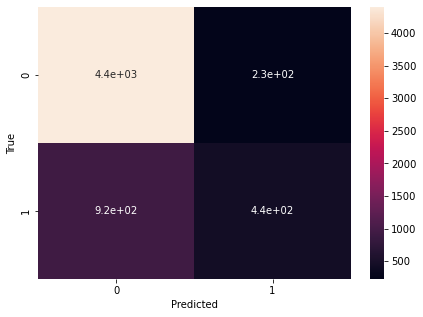

In [336]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')

In [337]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, y_train)
y_predict1 = random_forest.predict(X_test)
#random_forest.score(X_test,y_test)
randomforest_accuracy = accuracy_score(y_test, y_predict1)


C:\Users\ACER\AppData\Local\Temp\ipykernel_20656\3905790077.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


In [338]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
y_pred2 = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, y_pred2)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [340]:
["knn-{knn_accuracy}",randomforest_accuracy,naive_bayes_accuracy]

['knn-{knn_accuracy}', 0.8162685819275096, 0.7312510439285118]

In [341]:
{"knn_accuracy":knn_accuracy,"random_forest_accuracy":randomforest_accuracy,"naive_bayes_accuracy":naive_bayes_accuracy}

{'knn_accuracy': 0.8084182395189577,
 'random_forest_accuracy': 0.8162685819275096,
 'naive_bayes_accuracy': 0.7312510439285118}